## Project 1 pilot study single subject single ROI

In [357]:
# load all the packages and libraries going to be used
%pylab inline
from mvpa2.suite import *
import os.path as op
import sklearn
import seaborn as sns
from pywt import wavedecn
from scipy import stats
from mpl_toolkits import mplot3d

Populating the interactive namespace from numpy and matplotlib


In [358]:
# First, let's load fMRI data, 4 runs
subjects = 's105'
bold_fname = (subjects+'/'+subjects+'.nii/2.nii',subjects+'/'+subjects+'.nii/4.nii',subjects+'/'+subjects+'.nii/6.nii',subjects+'/'+subjects+'.nii/8.nii')

chunks = np.zeros (320)
chunks[:80]=1
chunks[80:160]=2
chunks[160:240]=3
chunks[240:320]=4

ds= fmri_dataset(bold_fname)
print 'sample_number=',len(ds)  # check how many samples or volumes;
print'feature_number=',ds.nfeatures # check how many feature are there;
print'data_info=',ds.shape # check teh 2-dimensianl dataset info;

sample_number= 320
feature_number= 152256
data_info= (320, 152256)


In [359]:
# Load in the mask of the ROI
mask_fname=('right_fus.nii')# 
ds = fmri_dataset (bold_fname, mask=mask_fname)
print 'sample_number=',len(ds)  # check how many samples or volumes;
print'feature_number=',ds.nfeatures # check how many feature being used;
print'data_info=',ds.shape # check teh 2-dimensianl dataset info;

sample_number= 320
feature_number= 166
data_info= (320, 166)


In [360]:
# explore the dataset attributes
print 'TR_index=', ds.sa.time_indices[:5]
print 'Actual time of TR=', ds.sa.time_coords[:5]
print 'ori_voxel_feature=', ds.fa.voxel_indices[:5] # The first five feature, we can see the spatial info is preseverd!
print 'voxel_size=', ds.a.voxel_eldim
print 'volumes_dim=', ds.a.voxel_dim

TR_index= [0 1 2 3 4]
Actual time of TR= [0. 2. 4. 6. 8.]
ori_voxel_feature= [[32 37 15]
 [32 37 16]
 [33 35 14]
 [33 36 14]
 [33 36 15]]
voxel_size= (3.125, 3.125, 3.125)
volumes_dim= (52, 61, 48)


In [361]:
ds.a.mapper # Since the the most important feature of this toolbox is everything
            # can be reversed back. why? Becaused everything has been recored! How cool 
            # is that!
# stripped = ds.copy(deep=False, sa=['time_coords'],fa=[],a=[])
# Print stripped
# Having all these attributes being part of a dataset is often a useful thing to have, but in some cases (e.g. when it
# comes to efficiency, and/or very large datasets) one might want to have a leaner dataset with just the information
# that is really necessary. One way to achieve this, is to strip all unwanted attributes. The Dataset class’ copy()
# method can help with that.

ChainMapper(nodes=[FlattenMapper(shape=(52, 61, 48), auto_train=True, space='voxel_indices'), StaticFeatureSelection(dshape=(152256,), slicearg=array([False, False, False, ..., False, False, False]))])

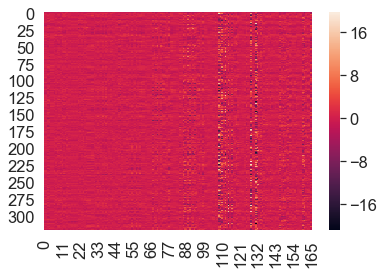

In [362]:
np.mean(ds)
sns.heatmap(ds)

In [363]:
# Load in the condition label file
conditions=np.loadtxt('regressor_shifted.csv',delimiter=',')
# cond_labels_shifted = np.zeros(cond_labels.shape)
# cond_labels_shifted[2:] = cond_labels[:-2]
# return cond_labels_shifted

In [364]:
ds = fmri_dataset (bold_fname, mask=mask_fname, targets= conditions, chunks=chunks)
print ds.summary()

Dataset: 320x166@float32, <sa: chunks,targets,time_coords,time_indices>, <fa: voxel_indices>, <a: imgaffine,imghdr,imgtype,mapper,voxel_dim,voxel_eldim>
stats: mean=4.25101e-06 std=1.64938 var=2.72047 min=-20.7587 max=19.6356

Counts of targets in each chunk:
  chunks\targets 0.0 1.0 2.0 3.0 4.0
                 --- --- --- --- ---
       1.0        56  6   6   6   6
       2.0        56  6   6   6   6
       3.0        56  6   6   6   6
       4.0        56  6   6   6   6

Summary for targets across chunks
  targets mean std min max #chunks
    0      56   0   56  56    4
    1       6   0   6   6     4
    2       6   0   6   6     4
    3       6   0   6   6     4
    4       6   0   6   6     4

Summary for chunks across targets
  chunks mean std min max #targets
    1     16   20  6   56     5
    2     16   20  6   56     5
    3     16   20  6   56     5
    4     16   20  6   56     5
Sequence statistics for 320 entries from set [0.0, 1.0, 2.0, 3.0, 4.0]
Counter-balance table f

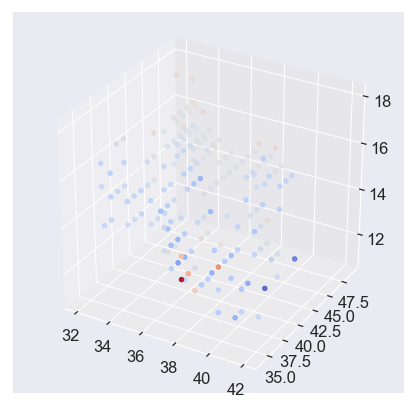

In [365]:
fig = plt.figure(figsize= (7,7))
ax = plt.axes(projection='3d')
vol=ds.fa.voxel_indices
x = vol[:,0]
y = vol[:,1]
z = vol[:,2]
ax.scatter3D(x,y,z, c= np.ravel(ds[0,:]),cmap='coolwarm') #ravel to conpress; Let's look at the first TR with 92 TR
# Good demonstration that spatial info can be preserved

1 = words

2 = faces

3 = tools/shapes

4 = numbers

In [366]:
words = ds.targets == 1
faces = ds.targets == 2
shapes = ds.targets == 3
numbers = ds.targets == 4

In [367]:
words_allTR = ds[words,:]
faces_allTR = ds[faces,:]
shapes_allTR = ds[shapes,:]
numbers_allTR = ds[numbers,:]
words_mean = np.mean(words_allTR,axis=0)
faces_mean = np.mean(faces_allTR,axis=0)
shapes_mean = np.mean(shapes_allTR,axis=0)
numbers_mean = np.mean(numbers_allTR,axis=0)

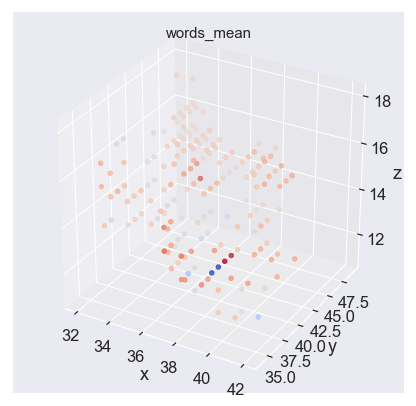

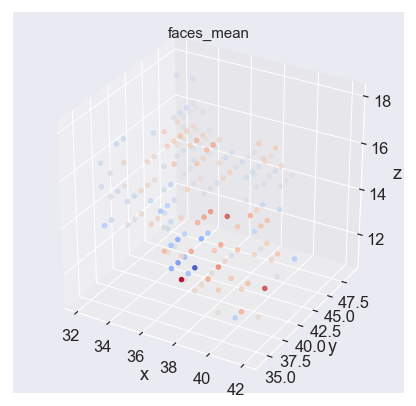

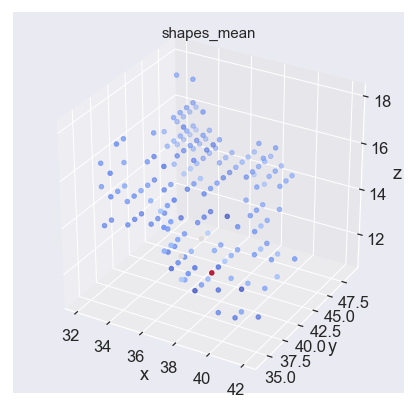

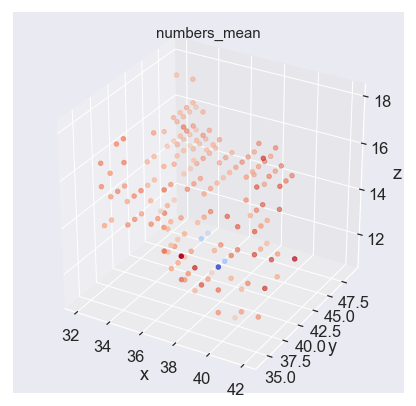

In [368]:
vol=ds.fa.voxel_indices
x = vol[:,0]
y = vol[:,1]
z = vol[:,2]

# Here I ploted four objects, each one has many pictures, so we goanna look at the mean pic of each.
cantlon = [words_mean,faces_mean,shapes_mean,numbers_mean]
cantlon_titles = ["words_mean","faces_mean","shapes_mean","numbers_mean"]

for i in range(len(cantlon)):
    fig = plt.figure(figsize= (7,7))
    ax = plt.axes(projection='3d')
    ax.scatter3D(x,y,z, c= np.ravel(cantlon[i]),cmap='coolwarm')
    ax.set_title (cantlon_titles[i],fontsize=15)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    

Text(0,0.5,'y')

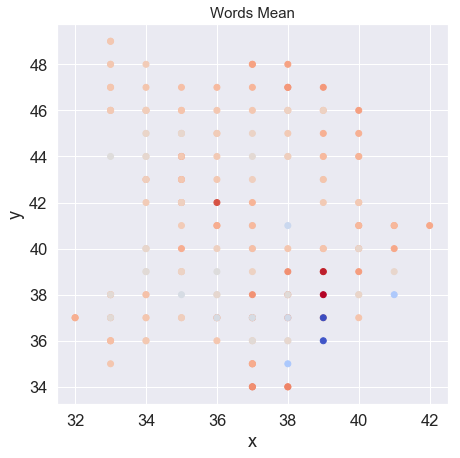

In [369]:
# 3D project to 2D
fig = plt.figure(figsize= (7,7))
ax = plt.axes()
vol=ds.fa.voxel_indices
x = vol[:,0]
y = vol[:,1]
z = vol[:,2]
ax.scatter(x,y, c= np.ravel(words_mean),cmap='coolwarm') #take all 
ax.set_title ('Words Mean',fontsize=15)
ax.set_xlabel("x")
ax.set_ylabel("y")
#ax.set_zlabel("z")

In [370]:
orig_data = ds.a.mapper.reverse(ds.samples)
m = fmri_dataset('right_fus.nii')

In [371]:
orig_mask = m.a.mapper.reverse(m.samples)

In [372]:
orig_mask.shape

(1, 52, 61, 48)

In [373]:
orig_data.shape

(320, 52, 61, 48)

In [374]:
new_data = orig_mask * orig_data

In [375]:
new_data.shape[0]

320

In [376]:
sum_var_all=[]
# loop over TR
for i in range(new_data.shape[0]):
    TR=new_data[i,:,:,:]
    coeff = pywt.wavedecn(TR, 'haar')
    len(coeff)
    len(coeff[-1])

    
    sum_var=[]
    
    for j in range(len(coeff)-1): #loop over levels
        level=j+1
        # coeff[-level] is now a dictionary
        aad = coeff[-level]['aad']
        ada = coeff[-level]['ada']
        daa = coeff[-level]['daa']
        add = coeff[-level]['aad']
        dad = coeff[-level]['dad']
        dda = coeff[-level]['dda']
        ddd = coeff[-level]['ddd']
        sum_var.append(aad.var() +ada.var() +daa.var()+add.var() +dad.var() +dda.var()+ddd.var())
    sum_var_all.append(sum_var)
print 'sum var for all TRs=',sum_var_all # each numer describes the new feature for each level, then we have 5 new features based one 5 levels.

sum var for all TRs= [[0.0109143965, 0.027160853, 0.06377688, 0.13248602, 0.25374508], [0.010567951, 0.025885992, 0.062317193, 0.12718329, 0.239085], [0.033779994, 0.048458666, 0.092478305, 0.104319416, 0.058232196], [0.020799674, 0.042376563, 0.052720286, 0.03125374, 0.025742501], [0.02170381, 0.034182675, 0.07494356, 0.122805096, 0.20453306], [0.02205747, 0.016677167, 0.01998519, 0.045140065, 0.054162964], [0.017384192, 0.029635279, 0.08778035, 0.198308, 0.32758704], [0.014074737, 0.03211927, 0.06377053, 0.09662799, 0.19876501], [0.009335666, 0.012525826, 0.016271926, 0.020628346, 0.008653821], [0.014153091, 0.023764819, 0.031992525, 0.024984313, 0.013237569], [0.014064286, 0.052788094, 0.07220771, 0.14660658, 0.25382796], [0.024606165, 0.058423426, 0.081885405, 0.2103902, 0.26725245], [0.02655484, 0.03159686, 0.0508196, 0.014572911, 0.0011115228], [0.012705827, 0.02719051, 0.047442846, 0.020902032, 0.0030120998], [0.010889735, 0.024476746, 0.07233734, 0.15691322, 0.25843972], [0.012

In [377]:
coeff[2]['aad'].shape

(4, 4, 3)

Text(0.5,1,'Distances: z-scored, detrended (sorted by targets)')

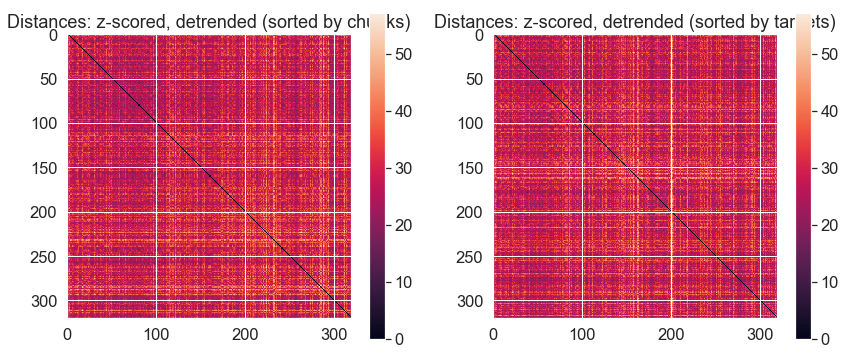

In [378]:
pl.figure(figsize=(14, 6))
pl.subplot(121)
plot_samples_distance(ds, sortbyattr='chunks')
pl.title('Distances: z-scored, detrended (sorted by chunks)')
pl.subplot(122)
plot_samples_distance(ds, sortbyattr='targets')
pl.title('Distances: z-scored, detrended (sorted by targets)')

In [379]:
#preprocessing and get rid of resting state
poly_detrend(ds, polyord=1, chunks_attr='chunks')
zscore(ds, param_est=('targets', [0]))
ds = ds[ds.sa.targets != 0]

Text(0.5,1,'Distances: z-scored, detrended (sorted by targets)')

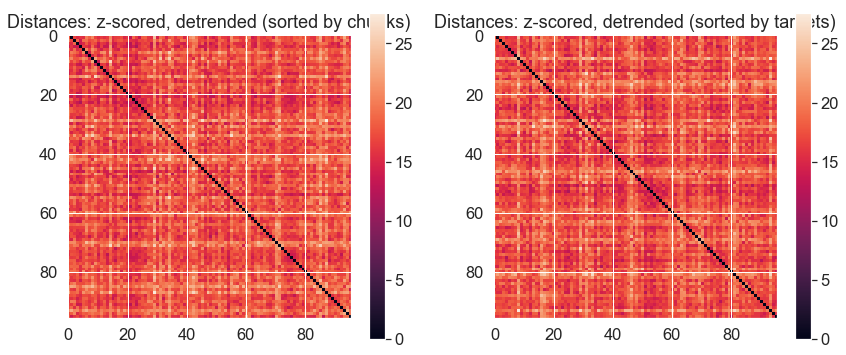

In [380]:
pl.figure(figsize=(14, 6))
pl.subplot(121)
plot_samples_distance(ds, sortbyattr='chunks')
pl.title('Distances: z-scored, detrended (sorted by chunks)')
pl.subplot(122)
plot_samples_distance(ds, sortbyattr='targets')
pl.title('Distances: z-scored, detrended (sorted by targets)')

In [381]:
clf = kNN(k=1, dfx=one_minus_correlation, voting='majority')
cvte = CrossValidation(clf, NFoldPartitioner(),errorfx=lambda p, t: np.mean(p == t))
cv_results = cvte(ds)
KNN_orig = np.mean(cv_results)
print 'Mean accuracy KNN_Orig=', KNN_orig
print
# test the significance
t, p = stats.ttest_1samp(cv_results,.25)
print 't_value=', t
print 'p_value_orig=', p
print
print 'Accuracy for each run=', cv_results.samples

Mean accuracy KNN_Orig= 0.375

t_value= [2.59807621]
p_value_orig= [0.08050957]

Accuracy for each run= [[0.29166667]
 [0.45833333]
 [0.29166667]
 [0.45833333]]


In [382]:
# Try different classifers-SVM
clf = LinearCSVMC()
cvte = CrossValidation(clf, NFoldPartitioner(),errorfx=lambda p, t: np.mean(p == t))
cv_results_svm= cvte(ds)
SVM_orig = np.mean(cv_results_svm)
print 'Mean accuracy SVM_orig=',SVM_orig
print
# Test the results significance
t_svm, p_svm= stats.ttest_1samp(cv_results_svm,.25)
print
print 't_value_svm=', t_svm
print 'p_value_svm=', p_svm

Mean accuracy SVM_orig= 0.40625


t_value_svm= [7.83349452]
p_value_svm= [0.00433206]


In [383]:
# Try different classifers-GNB
clf = GNB()
cvte = CrossValidation(clf, NFoldPartitioner(),errorfx=lambda p, t: np.mean(p == t))
cv_results_gnb= cvte(ds)
GNB_orig = np.mean(cv_results_gnb)
print 'Mean accuracy GNB_orig=',GNB_orig
print
# Test the results significance
t_gnb, p_gnb= stats.ttest_1samp(cv_results_gnb,.25)
print
print 't_new_value_gnb=', t_gnb
print 'p_new_value_gnb=', p_gnb

Mean accuracy GNB_orig= 0.3958333333333333


t_new_value_gnb= [4.04145188]
p_new_value_gnb= [0.02726185]


## Define the function to capture the spreadness of our data. 

In [384]:
ds = fmri_dataset(bold_fname, mask=mask_fname, targets=conditions, chunks=chunks)
print ds.summary()

Dataset: 320x166@float32, <sa: chunks,targets,time_coords,time_indices>, <fa: voxel_indices>, <a: imgaffine,imghdr,imgtype,mapper,voxel_dim,voxel_eldim>
stats: mean=4.25101e-06 std=1.64938 var=2.72047 min=-20.7587 max=19.6356

Counts of targets in each chunk:
  chunks\targets 0.0 1.0 2.0 3.0 4.0
                 --- --- --- --- ---
       1.0        56  6   6   6   6
       2.0        56  6   6   6   6
       3.0        56  6   6   6   6
       4.0        56  6   6   6   6

Summary for targets across chunks
  targets mean std min max #chunks
    0      56   0   56  56    4
    1       6   0   6   6     4
    2       6   0   6   6     4
    3       6   0   6   6     4
    4       6   0   6   6     4

Summary for chunks across targets
  chunks mean std min max #targets
    1     16   20  6   56     5
    2     16   20  6   56     5
    3     16   20  6   56     5
    4     16   20  6   56     5
Sequence statistics for 320 entries from set [0.0, 1.0, 2.0, 3.0, 4.0]
Counter-balance table f

In [385]:
def cal_R_sq (v_i,x_i,y_i,z_i):
    """Define the function that is gonna be used for the feature extration"""
    x_c = sum(np.abs(v_i)*x_i)/sum(np.abs(v_i))
    y_c = sum(np.abs(v_i)*y_i)/sum(np.abs(v_i))
    z_c = sum(np.abs(v_i)*z_i)/sum(np.abs(v_i))
    R_2 = sum(((x_i-x_c)**2+(y_i-y_c)**2)*np.abs(v_i))/sum(np.abs(v_i))
    return R_2

In [386]:
# turn the list above into array
new_five_feature = np.asarray(sum_var_all)
data_five_feature = np.hstack([ds, new_five_feature])
# Create a new dataset after adding in the additional label
ds_new = dataset_wizard(data_five_feature, targets=conditions, chunks=chunks)
ds_new.shape
print ds.shape
print new_five_feature.shape

(320, 166)
(320, 5)


In [387]:
print new_five_feature

[[0.0109144  0.02716085 0.06377688 0.13248602 0.25374508]
 [0.01056795 0.02588599 0.06231719 0.12718329 0.239085  ]
 [0.03377999 0.04845867 0.09247831 0.10431942 0.0582322 ]
 ...
 [0.01015446 0.02598387 0.11222562 0.13471484 0.11516166]
 [0.01073751 0.01851581 0.01601476 0.01264895 0.00832196]
 [0.0160894  0.04772723 0.02584923 0.0109396  0.0132872 ]]


Text(0.5,1,'Distances: z-scored, detrended (sorted by targets)')

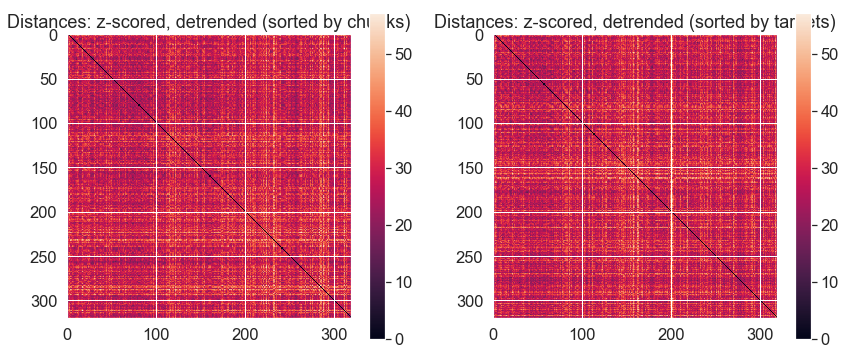

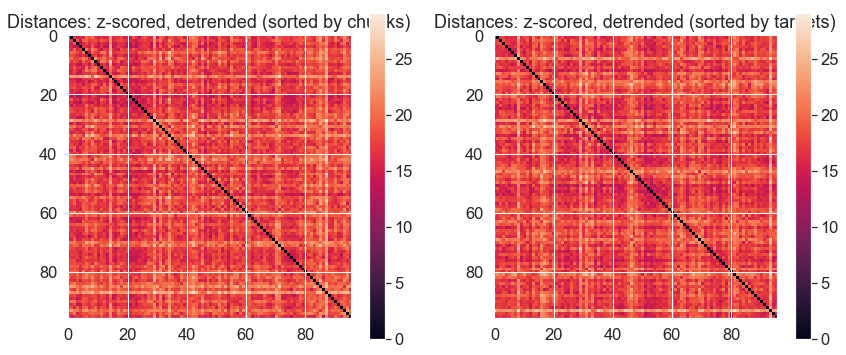

In [388]:
pl.figure(figsize=(14, 6))
pl.subplot(121)
plot_samples_distance(ds_new, sortbyattr='chunks')
pl.title('Distances: z-scored, detrended (sorted by chunks)')
pl.subplot(122)
plot_samples_distance(ds_new, sortbyattr='targets')
pl.title('Distances: z-scored, detrended (sorted by targets)')

#preprocessing on the dataset with new features
poly_detrend(ds_new, polyord=1, chunks_attr='chunks')
zscore(ds_new, param_est=('targets', [0]))
ds_new = ds_new[ds_new.sa.targets != 0]

pl.figure(figsize=(14, 6))
pl.subplot(121)
plot_samples_distance(ds_new, sortbyattr='chunks')
pl.title('Distances: z-scored, detrended (sorted by chunks)')
pl.subplot(122)
plot_samples_distance(ds_new, sortbyattr='targets')
pl.title('Distances: z-scored, detrended (sorted by targets)')

In [389]:
# Classification based on new feature added
clf = kNN(k=1, dfx=one_minus_correlation, voting='majority')
cvte = CrossValidation(clf, NFoldPartitioner(),errorfx=lambda p, t: np.mean(p == t))
cv_new_results = cvte(ds_new)
KNN_new = np.mean(cv_new_results)
print 'Mean Accuracy KNN_new=', KNN_new
# Test the results significance
print
t_new, p_new = stats.ttest_1samp(cv_new_results,.25)
print 't_new_value=', t_new
print 'p_new_value=', p_new
print
print 'Accuracy for each run=', cv_new_results.samples

Mean Accuracy KNN_new= 0.3541666666666667

t_new_value= [2.61116484]
p_new_value= [0.07960498]

Accuracy for each run= [[0.29166667]
 [0.45833333]
 [0.29166667]
 [0.375     ]]


In [390]:
# Try different classifers-SVM
clf = LinearCSVMC()
cvte = CrossValidation(clf, NFoldPartitioner(),errorfx=lambda p, t: np.mean(p == t))
cv_results_svm= cvte(ds_new)
SVM_new = np.mean(cv_results_svm)
print 'Mean accuracy SVM=',SVM_new
print
# Test the results significance
t_new_svm, p_new_svm= stats.ttest_1samp(cv_new_results,.25)
print
print 't_new_value_svm=', t_new_svm
print 'p_new_value_svm=', p_new_svm

Mean accuracy SVM= 0.3645833333333333


t_new_value_svm= [2.61116484]
p_new_value_svm= [0.07960498]


In [391]:
# Try different classifers-GNB
clf = GNB()
cvte = CrossValidation(clf, NFoldPartitioner(),errorfx=lambda p, t: np.mean(p == t))
cv_results_gnb= cvte(ds_new)
GNB_new = np.mean(cv_results_gnb)
print 'Mean accuracy GNB=',GNB_new
print
# Test the results significance
t_new_gnb, p_new_gnb= stats.ttest_1samp(cv_results_gnb,.25)
print
print 't_new_value_gnb=', t_new_gnb
print 'p_new_value_gnb=', p_new_gnb

Mean accuracy GNB= 0.3541666666666667


t_new_value_gnb= [2.10042013]
p_new_value_gnb= [0.12651459]


In [392]:
# a= fmri_dataset('right_fus.nii')
# a.samples[:,a.fa['voxel_indices'][:,0] < 25] = 0
# nimg = map2nifti(a)
# nimg.to_filename('masktest.nii')

In [393]:
a= fmri_dataset('right_fus.nii')
#a.samples[:,a.fa['voxel_indices'][:,0] < 25] = 0
#nimg = map2nifti(a)
#nimg.to_filename('masktest.nii')
# plt.hist(a.samples)

In [394]:
a.samples;
np.sum(a.samples == 2);
np.sum(a.samples == 1);

In [395]:
new_five_feature.shape

(320, 5)

In [396]:
words = ds.targets == 1
faces = ds.targets == 2
shapes = ds.targets == 3
numbers = ds.targets == 4

In [397]:
words_allTR = ds[words,:]
faces_allTR = ds[faces,:]
shapes_allTR = ds[shapes,:]
numbers_allTR = ds[numbers,:]

In [398]:
ds.targets.shape

(320,)

In [399]:
ds.shape

(320, 166)

In [400]:
words_five_num = new_five_feature[words,:]
faces_five_num = new_five_feature[faces,:]
shapes_five_num = new_five_feature[shapes,:]
numbers_five_num = new_five_feature[numbers,:]

print words_five_num.shape
print faces_five_num.shape
print shapes_five_num.shape
print numbers_five_num.shape

(24, 5)
(24, 5)
(24, 5)
(24, 5)


In [401]:
# Since based on my theory, the first and last level will bear the most difference.
# So I would like to plot the first and the last scale level across four conditions. 

words_five_num_15 = words_five_num[:,[0,4]]
faces_five_num_15= faces_five_num [:,[0,4]]
shapes_five_num_15= shapes_five_num [:,[0,4]]
numbers_five_num_15= numbers_five_num [:,[0,4]]

words_five_num_15.shape

(24, 2)

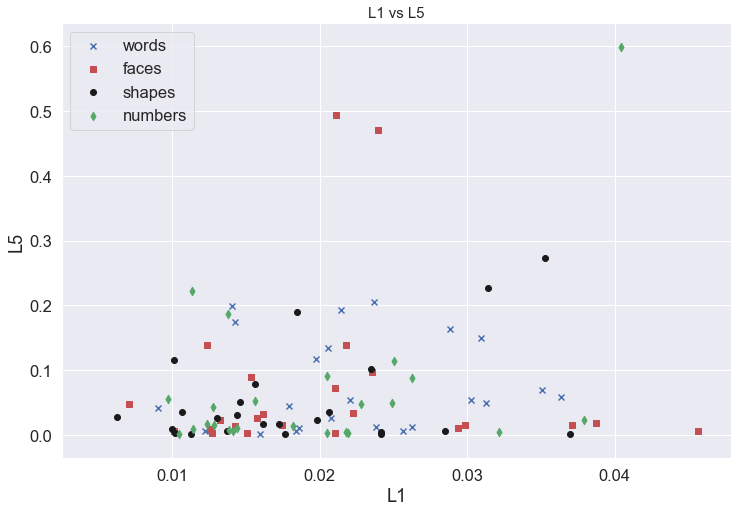

In [402]:
# The fist and last levels.
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax1.set_title ('L1 vs L5',fontsize=15)
ax1.set_xlabel("L1")
ax1.set_ylabel("L5")

ax1.scatter(words_five_num_15[:,0],words_five_num_15[:,1], c='b', marker="x", label='words')
ax1.scatter(faces_five_num_15[:,0],faces_five_num_15[:,1], c='r', marker="s", label='faces')
ax1.scatter(shapes_five_num_15[:,0],shapes_five_num_15[:,1], c='k', marker="o", label='shapes')
ax1.scatter(numbers_five_num_15[:,0],numbers_five_num_15[:,1], c='g', marker="d", label='numbers')
plt.legend(loc='upper left');
plt.show()


In [403]:
# Since based on my theory, the first and last level will bear the most difference.
# So I would like to plot the first and the last scale level across four conditions. 

words_five_num_24 = words_five_num[:,[1,3]]
faces_five_num_24= faces_five_num [:,[1,3]]
shapes_five_num_24= shapes_five_num [:,[1,3]]
numbers_five_num_24= numbers_five_num [:,[1,3]]


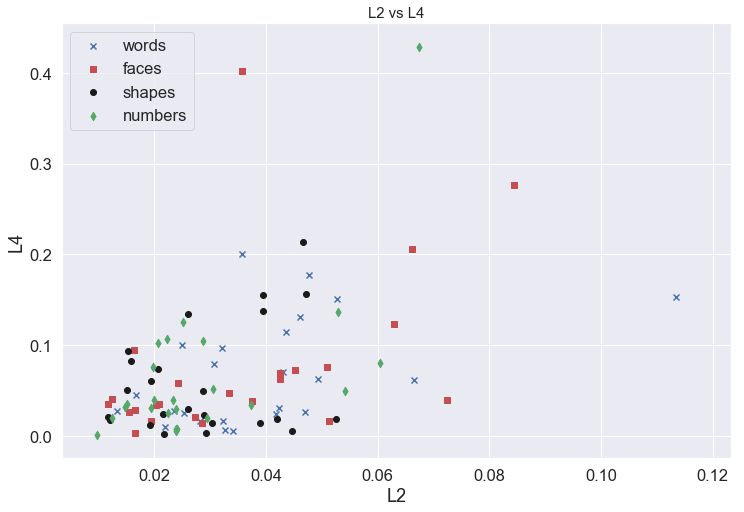

In [404]:
# The the second and fourth levels.
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax1.set_title ('L2 vs L4',fontsize=15)
ax1.set_xlabel("L2")
ax1.set_ylabel("L4")

ax1.scatter(words_five_num_24[:,0],words_five_num_24[:,1], c='b', marker="x", label='words')
ax1.scatter(faces_five_num_24[:,0],faces_five_num_24[:,1], c='r', marker="s", label='faces')
ax1.scatter(shapes_five_num_24[:,0],shapes_five_num_24[:,1], c='k', marker="o", label='shapes')
ax1.scatter(numbers_five_num_24[:,0],numbers_five_num_24[:,1], c='g', marker="d", label='numbers')
plt.legend(loc='upper left');
plt.show()

## Level_1 Analysis


p_value= 0.48325062619541614

words mean1= 0.02208065
faces mean1= 0.02073308
shapes mean1= 0.018502355
numbers mean1= 0.019383747



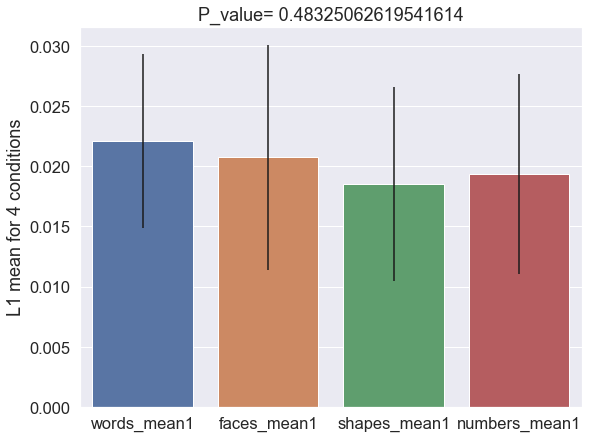

In [405]:
# Run ANOVA
words_L1_24num = words_five_num[:,0]
faces_L1_24num= faces_five_num [:,0]
shapes_L1_24num= shapes_five_num [:,0]
numbers_L1_24num= numbers_five_num [:,0]
print 
anova = stats.f_oneway(words_L1_24num,faces_L1_24num,shapes_L1_24num,numbers_L1_24num)
p_value = anova[1]
print 'p_value=', p_value
print 


# Calculate the mean of the frist level of four conditions
words_five_num_mean1 = mean(words_five_num[:,0])
faces_five_num_mean1= mean(faces_five_num [:,0])
shapes_five_num_mean1= mean(shapes_five_num [:,0])
numbers_five_num_mean1= mean(numbers_five_num [:,0])

# Calcuale the std of first level of four conditons
words_five_num_std1 = std(words_five_num[:,0])
faces_five_num_std1= std(faces_five_num [:,0])
shapes_five_num_std1= std(shapes_five_num [:,0])
numbers_five_num_std1= std(numbers_five_num [:,0])

print 'words mean1=', words_five_num_mean1
print 'faces mean1=', faces_five_num_mean1
print 'shapes mean1=', shapes_five_num_mean1
print 'numbers mean1=', numbers_five_num_mean1
print

x = ['words_mean1', 'faces_mean1', 'shapes_mean1', 'numbers_mean1']
y = [words_five_num_mean1,faces_five_num_mean1,shapes_five_num_mean1,numbers_five_num_mean1]

# To create the error bar, needs this info.
yerror = [words_five_num_std1,faces_five_num_std1,shapes_five_num_std1,numbers_five_num_std1]

sns.set(font_scale=1.5)
fig = plt.figure(figsize=(9,7))
ax = sns.barplot(x, y,yerr=yerror)
ax.set_ylabel('L1 mean for 4 conditions')
ax.set_title('P_value= %s' %p_value)
plt.show()


In [406]:
# Import visualisation libaries
import plotly.plotly as py
import cufflinks as cf
import pandas as pd
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [407]:
# Creating pandas dataframe from numpy array
L1 = pd.DataFrame({'words_24': words_L1_24num, 'faces_24':faces_L1_24num,'shapes_24':shapes_L1_24num,'numbers_24':numbers_L1_24num})
#print(L1)
L1.iplot(kind='box',title = '4 Conditions L1')


## Level_5 Analysis


p_value= 0.8856369879616204

words mean5= 0.074840985
faces mean5= 0.07422575
shapes mean5= 0.05348677
numbers mean5= 0.06946661



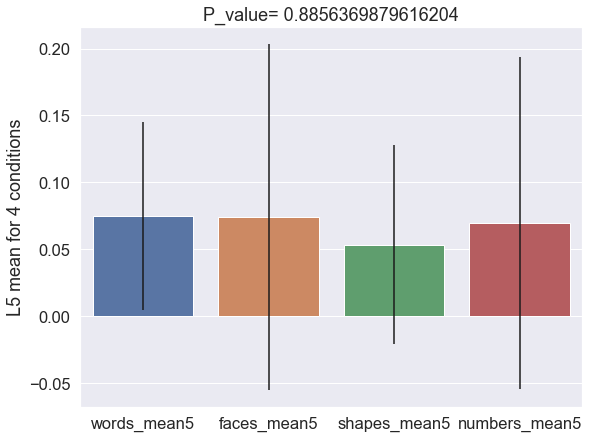

In [408]:
# Run ANOVA
words_L5_24num = words_five_num[:,4]
faces_L5_24num= faces_five_num [:,4]
shapes_L5_24num= shapes_five_num [:,4]
numbers_L5_24num= numbers_five_num [:,4]
print 
anova = stats.f_oneway(words_L5_24num,faces_L5_24num,shapes_L5_24num,numbers_L5_24num)
p_value = anova[1]
print 'p_value=', p_value
print 


# Calculate the mean of the frist level of four conditions
words_five_num_mean5 = mean(words_five_num[:,4])
faces_five_num_mean5= mean(faces_five_num [:,4])
shapes_five_num_mean5= mean(shapes_five_num [:,4])
numbers_five_num_mean5= mean(numbers_five_num [:,4])

# Calcuale the std of first level of four conditons
words_five_num_std5 = std(words_five_num[:,4])
faces_five_num_std5= std(faces_five_num [:,4])
shapes_five_num_std5= std(shapes_five_num [:,4])
numbers_five_num_std5= std(numbers_five_num [:,4])

print 'words mean5=', words_five_num_mean5
print 'faces mean5=', faces_five_num_mean5
print 'shapes mean5=', shapes_five_num_mean5
print 'numbers mean5=', numbers_five_num_mean5
print

x = ['words_mean5', 'faces_mean5', 'shapes_mean5', 'numbers_mean5']
y = [words_five_num_mean5,faces_five_num_mean5,shapes_five_num_mean5,numbers_five_num_mean5]

# To create the error bar, needs this info.
yerror = [words_five_num_std5,faces_five_num_std5,shapes_five_num_std5,numbers_five_num_std5]

sns.set(font_scale=1.5)
fig = plt.figure(figsize=(9,7))
ax = sns.barplot(x, y,yerr=yerror)
ax.set_ylabel('L5 mean for 4 conditions')
ax.set_title('P_value= %s' %p_value)
plt.show()


In [409]:
# Creating pandas dataframe from numpy array
L5 = pd.DataFrame({'words_24': words_L5_24num, 'faces_24':faces_L5_24num,'shapes_24':shapes_L5_24num,'numbers_24':numbers_L5_24num})
#print(L5)
L5.iplot(kind='box',title = '4 Conditions L5')

## Leve_2 Analysis


p_value= 0.08505998231080096

words mean2= 0.03934172
faces mean2= 0.035576593
shapes mean2= 0.028835088
numbers mean2= 0.02835947



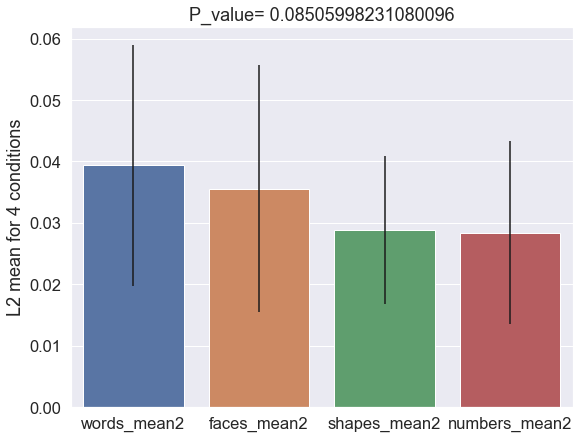

In [410]:
# Run ANOVA
words_L2_24num = words_five_num[:,1]
faces_L2_24num= faces_five_num [:,1]
shapes_L2_24num= shapes_five_num [:,1]
numbers_L2_24num= numbers_five_num [:,1]
print 
anova = stats.f_oneway(words_L2_24num,faces_L2_24num,shapes_L2_24num,numbers_L2_24num)
p_value = anova[1]
print 'p_value=', p_value
print 


# Calculate the mean of the frist level of four conditions
words_five_num_mean2 = mean(words_five_num[:,1])
faces_five_num_mean2= mean(faces_five_num [:,1])
shapes_five_num_mean2= mean(shapes_five_num [:,1])
numbers_five_num_mean2= mean(numbers_five_num [:,1])

# Calcuale the std of first level of four conditons
words_five_num_std2 = std(words_five_num[:,1])
faces_five_num_std2= std(faces_five_num [:,1])
shapes_five_num_std2= std(shapes_five_num [:,1])
numbers_five_num_std2= std(numbers_five_num [:,1])

print 'words mean2=', words_five_num_mean2
print 'faces mean2=', faces_five_num_mean2
print 'shapes mean2=', shapes_five_num_mean2
print 'numbers mean2=', numbers_five_num_mean2
print

x = ['words_mean2', 'faces_mean2', 'shapes_mean2', 'numbers_mean2']
y = [words_five_num_mean2,faces_five_num_mean2,shapes_five_num_mean2,numbers_five_num_mean2]

# To create the error bar, needs this info.
yerror = [words_five_num_std2,faces_five_num_std2,shapes_five_num_std2,numbers_five_num_std2]

sns.set(font_scale=1.5)
fig = plt.figure(figsize=(9,7))
ax = sns.barplot(x, y,yerr=yerror)
ax.set_ylabel('L2 mean for 4 conditions')
ax.set_title('P_value= %s' %p_value)
plt.show()


In [411]:
# Creating pandas dataframe from numpy array
L2 = pd.DataFrame({'words_24': words_L2_24num, 'faces_24':faces_L2_24num,'shapes_24':shapes_L2_24num,'numbers_24':numbers_L2_24num})
#print(L2)
L2.iplot(kind='box',title = '4 Conditions L2')

## Level_3 Analysis


p_value= 0.7000062964362506

words mean3= 0.0603946
faces mean3= 0.06447395
shapes mean3= 0.049763996
numbers mean3= 0.05380289



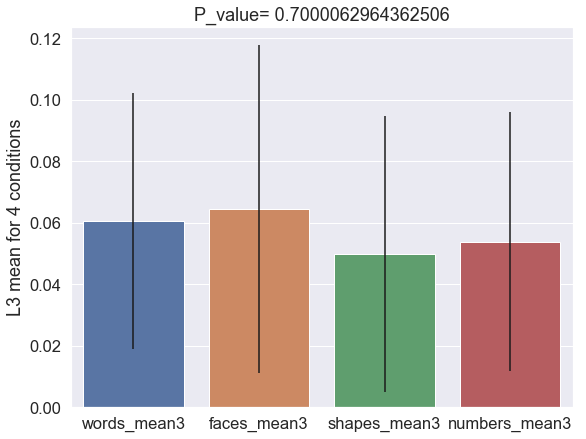

In [412]:
# Run ANOVA
words_L3_24num = words_five_num[:,2]
faces_L3_24num= faces_five_num [:,2]
shapes_L3_24num= shapes_five_num [:,2]
numbers_L3_24num= numbers_five_num [:,2]
print 
anova = stats.f_oneway(words_L3_24num,faces_L3_24num,shapes_L3_24num,numbers_L3_24num)
p_value = anova[1]
print 'p_value=', p_value
print 


# Calculate the mean of the frist level of four conditions
words_five_num_mean3 = mean(words_five_num[:,2])
faces_five_num_mean3= mean(faces_five_num [:,2])
shapes_five_num_mean3= mean(shapes_five_num [:,2])
numbers_five_num_mean3= mean(numbers_five_num [:,2])

# Calcuale the std of first level of four conditons
words_five_num_std3 = std(words_five_num[:,2])
faces_five_num_std3= std(faces_five_num [:,2])
shapes_five_num_std3= std(shapes_five_num [:,2])
numbers_five_num_std3= std(numbers_five_num [:,2])

print 'words mean3=', words_five_num_mean3
print 'faces mean3=', faces_five_num_mean3
print 'shapes mean3=', shapes_five_num_mean3
print 'numbers mean3=', numbers_five_num_mean3
print

x = ['words_mean3', 'faces_mean3', 'shapes_mean3', 'numbers_mean3']
y = [words_five_num_mean3,faces_five_num_mean3,shapes_five_num_mean3,numbers_five_num_mean3]

# To create the error bar, needs this info.
yerror = [words_five_num_std3,faces_five_num_std3,shapes_five_num_std3,numbers_five_num_std3]

sns.set(font_scale=1.5)
fig = plt.figure(figsize=(9,7))
ax = sns.barplot(x, y,yerr=yerror)
ax.set_ylabel('L3 mean for 4 conditions')
ax.set_title('P_value= %s' %p_value)
plt.show()


In [413]:
# Creating pandas dataframe from numpy array
L3 = pd.DataFrame({'words_24': words_L3_24num, 'faces_24':faces_L3_24num,'shapes_24':shapes_L3_24num,'numbers_24':numbers_L3_24num})
#print(L3)
L3.iplot(kind='box',title = '4 Conditions L3')

## Level_4 Analysis


p_value= 0.8820062719104517

words mean4= 0.069292605
faces mean4= 0.07667183
shapes mean4= 0.059057057
numbers mean4= 0.06635021



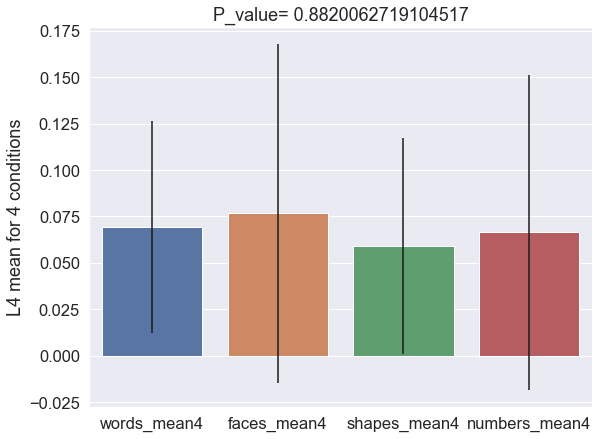

In [414]:
# Run ANOVA
words_L4_24num = words_five_num[:,3]
faces_L4_24num= faces_five_num [:,3]
shapes_L4_24num= shapes_five_num [:,3]
numbers_L4_24num= numbers_five_num [:,3]
print 
anova = stats.f_oneway(words_L4_24num,faces_L4_24num,shapes_L4_24num,numbers_L4_24num)
p_value = anova[1]
print 'p_value=', p_value
print 


# Calculate the mean of the frist level of four conditions
words_five_num_mean4 = mean(words_five_num[:,3])
faces_five_num_mean4= mean(faces_five_num [:,3])
shapes_five_num_mean4= mean(shapes_five_num [:,3])
numbers_five_num_mean4= mean(numbers_five_num [:,3])

# Calcuale the std of first level of four conditons
words_five_num_std4 = std(words_five_num[:,3])
faces_five_num_std4= std(faces_five_num [:,3])
shapes_five_num_std4= std(shapes_five_num [:,3])
numbers_five_num_std4= std(numbers_five_num [:,3])

print 'words mean4=', words_five_num_mean4
print 'faces mean4=', faces_five_num_mean4
print 'shapes mean4=', shapes_five_num_mean4
print 'numbers mean4=', numbers_five_num_mean4
print

x = ['words_mean4', 'faces_mean4', 'shapes_mean4', 'numbers_mean4']
y = [words_five_num_mean4,faces_five_num_mean4,shapes_five_num_mean4,numbers_five_num_mean4]

# To create the error bar, needs this info.
yerror = [words_five_num_std4,faces_five_num_std4,shapes_five_num_std4,numbers_five_num_std4]

sns.set(font_scale=1.5)
fig = plt.figure(figsize=(9,7))
ax = sns.barplot(x, y,yerr=yerror)
ax.set_ylabel('L4 mean for 4 conditions')
ax.set_title('P_value= %s' %p_value)
plt.show()


In [415]:
# Creating pandas dataframe from numpy array
L4 = pd.DataFrame({'words_24': words_L4_24num, 'faces_24':faces_L4_24num,'shapes_24':shapes_L4_24num,'numbers_24':numbers_L4_24num})
#print(L4)
L4.iplot(kind='box',title = '4 Conditions L4')

In [416]:
# Run ANOVA 5 levels for 4 conditions.
words_all_24num = words_five_num[:,:]
faces_all_24num= faces_five_num [:,:]
shapes_all_24num= shapes_five_num [:,:]
numbers_all_24num= numbers_five_num [:,:]
print 
anova = stats.f_oneway(words_all_24num,faces_all_24num,shapes_all_24num,numbers_all_24num)
p_value = anova[1]
print 'p_value=', p_value
print 



p_value= [0.48325063 0.08505998 0.7000063  0.88200627 0.88563699]



## Let's do some plotting

In [417]:
tr_stacked_list_L1 = []
tr_stacked_list_L2 = []
tr_stacked_list_L3 = []
tr_stacked_list_L4 = []
tr_stacked_list_L5 = []


# loop over TR
for i in range(new_data.shape[0]):
    TR=new_data[i,:,:,:]
    coeff = pywt.wavedecn(TR, 'haar')
    
#     for j in range(len(coeff)-1): #loop over levels
#        level=j+1
        # coeff[-level] is now a dictionary
    aad = coeff[-1]['aad']
    ada = coeff[-1]['ada']
    daa = coeff[-1]['daa']
    add = coeff[-1]['aad']
    dad = coeff[-1]['dad']
    dda = coeff[-1]['dda']
    ddd = coeff[-1]['ddd']
        
    angle_list = [aad, ada, daa, add, dad, dda, ddd]
    angle_stacked_L1 = np.stack(angle_list, axis=0)
    tr_stacked_list_L1.append(angle_stacked_L1)
    # print angle_stacked.shape 
    # 320TR loop over level_n 7angles. for example: the first level, 7angles, then 3 following
    # numbers are the 3d arrays within each angle.Then there are 320 TR.
    
    aad = coeff[-2]['aad']
    ada = coeff[-2]['ada']
    daa = coeff[-2]['daa']
    add = coeff[-2]['aad']
    dad = coeff[-2]['dad']
    dda = coeff[-2]['dda']
    ddd = coeff[-2]['ddd']
    
    angle_list = [aad, ada, daa, add, dad, dda, ddd]
    angle_stacked_L2 = np.stack(angle_list, axis=0)
    tr_stacked_list_L2.append(angle_stacked_L2)

    aad = coeff[-3]['aad']
    ada = coeff[-3]['ada']
    daa = coeff[-3]['daa']
    add = coeff[-3]['aad']
    dad = coeff[-3]['dad']
    dda = coeff[-3]['dda']
    ddd = coeff[-3]['ddd']
    
    angle_list = [aad, ada, daa, add, dad, dda, ddd]
    angle_stacked_L3 = np.stack(angle_list, axis=0)
    tr_stacked_list_L3.append(angle_stacked_L3)    
    
    aad = coeff[-4]['aad']
    ada = coeff[-4]['ada']
    daa = coeff[-4]['daa']
    add = coeff[-4]['aad']
    dad = coeff[-4]['dad']
    dda = coeff[-4]['dda']
    ddd = coeff[-4]['ddd']
    
    angle_list = [aad, ada, daa, add, dad, dda, ddd]
    angle_stacked_L4 = np.stack(angle_list, axis=0)
    tr_stacked_list_L4.append(angle_stacked_L4)   
    
    aad = coeff[-5]['aad']
    ada = coeff[-5]['ada']
    daa = coeff[-5]['daa']
    add = coeff[-5]['aad']
    dad = coeff[-5]['dad']
    dda = coeff[-5]['dda']
    ddd = coeff[-5]['ddd']
    
    angle_list = [aad, ada, daa, add, dad, dda, ddd]
    angle_stacked_L5 = np.stack(angle_list, axis=0)
    tr_stacked_list_L5.append(angle_stacked_L5)

In [418]:
# Stack over 320TRs

tr_stacked_L1 = np.stack(tr_stacked_list_L1, axis=0)
tr_stacked_L2 = np.stack(tr_stacked_list_L2, axis=0)
tr_stacked_L3 = np.stack(tr_stacked_list_L3, axis=0)
tr_stacked_L4 = np.stack(tr_stacked_list_L4, axis=0)
tr_stacked_L5 = np.stack(tr_stacked_list_L5, axis=0)
tr_stacked_L1.shape

(320, 7, 26, 31, 24)

In [419]:
# Level 1, select all conds
tr_stacked_L1_words = tr_stacked_L1[words,:,:,:,:]
tr_stacked_L1_faces = tr_stacked_L1[faces,:,:,:,:]
tr_stacked_L1_shapes = tr_stacked_L1[shapes,:,:,:,:]
tr_stacked_L1_numbers = tr_stacked_L1[numbers,:,:,:,:]

# Level 1, stack all conds
cond_stacked_list_L1 = [tr_stacked_L1_words,tr_stacked_L1_faces,tr_stacked_L1_shapes,tr_stacked_L1_numbers]
cond_stacked_L1 = np.stack(cond_stacked_list_L1, axis=0)
print "L1 shape:", cond_stacked_L1.shape

# Level 2, select all conds
tr_stacked_L2_words = tr_stacked_L2[words,:,:,:,:]
tr_stacked_L2_faces = tr_stacked_L2[faces,:,:,:,:]
tr_stacked_L2_shapes = tr_stacked_L2[shapes,:,:,:,:]
tr_stacked_L2_numbers = tr_stacked_L2[numbers,:,:,:,:]

# Level 2, stack all conds
cond_stacked_list_L2 = [tr_stacked_L2_words,tr_stacked_L2_faces,tr_stacked_L2_shapes,tr_stacked_L2_numbers]
cond_stacked_L2 = np.stack(cond_stacked_list_L2, axis=0)
print "L2 shape:", cond_stacked_L2.shape

# Level 3, select all conds
tr_stacked_L3_words = tr_stacked_L3[words,:,:,:,:]
tr_stacked_L3_faces = tr_stacked_L3[faces,:,:,:,:]
tr_stacked_L3_shapes = tr_stacked_L3[shapes,:,:,:,:]
tr_stacked_L3_numbers = tr_stacked_L3[numbers,:,:,:,:]

# Level 3, stack all conds
cond_stacked_list_L3 = [tr_stacked_L3_words,tr_stacked_L3_faces,tr_stacked_L3_shapes,tr_stacked_L3_numbers]
cond_stacked_L3 = np.stack(cond_stacked_list_L3, axis=0)
print "L3 shape:", cond_stacked_L3.shape

# Level 4, select all conds
tr_stacked_L4_words = tr_stacked_L4[words,:,:,:,:]
tr_stacked_L4_faces = tr_stacked_L4[faces,:,:,:,:]
tr_stacked_L4_shapes = tr_stacked_L4[shapes,:,:,:,:]
tr_stacked_L4_numbers = tr_stacked_L4[numbers,:,:,:,:]

# Level 4, stack all conds
cond_stacked_list_L4 = [tr_stacked_L4_words,tr_stacked_L4_faces,tr_stacked_L4_shapes,tr_stacked_L4_numbers]
cond_stacked_L4 = np.stack(cond_stacked_list_L4, axis=0)
print "L4 shape:", cond_stacked_L4.shape

# Level 5, select all conds
tr_stacked_L5_words = tr_stacked_L5[words,:,:,:,:]
tr_stacked_L5_faces = tr_stacked_L5[faces,:,:,:,:]
tr_stacked_L5_shapes = tr_stacked_L5[shapes,:,:,:,:]
tr_stacked_L5_numbers = tr_stacked_L5[numbers,:,:,:,:]

# Level 5, stack all conds
cond_stacked_list_L5 = [tr_stacked_L5_words,tr_stacked_L5_faces,tr_stacked_L5_shapes,tr_stacked_L5_numbers]
cond_stacked_L5 = np.stack(cond_stacked_list_L5, axis=0)
print "L5 shape:", cond_stacked_L5.shape

L1 shape: (4, 24, 7, 26, 31, 24)
L2 shape: (4, 24, 7, 13, 16, 12)
L3 shape: (4, 24, 7, 7, 8, 6)
L4 shape: (4, 24, 7, 4, 4, 3)
L5 shape: (4, 24, 7, 2, 2, 2)


In [420]:
# take mean across TR, then lose 24

C4_L1_7A_allTR_mean = np.mean(cond_stacked_L1,axis=1)
print C4_L1_7A_allTR_mean.shape
C4_L2_7A_allTR_mean = np.mean(cond_stacked_L2,axis=1)
C4_L3_7A_allTR_mean = np.mean(cond_stacked_L3,axis=1)
C4_L4_7A_allTR_mean = np.mean(cond_stacked_L4,axis=1)
C4_L5_7A_allTR_mean = np.mean(cond_stacked_L5,axis=1)
C4_L5_7A_allTR_mean.shape

(4, 7, 26, 31, 24)


(4, 7, 2, 2, 2)

## C1(words) _All levels _A1 plotting

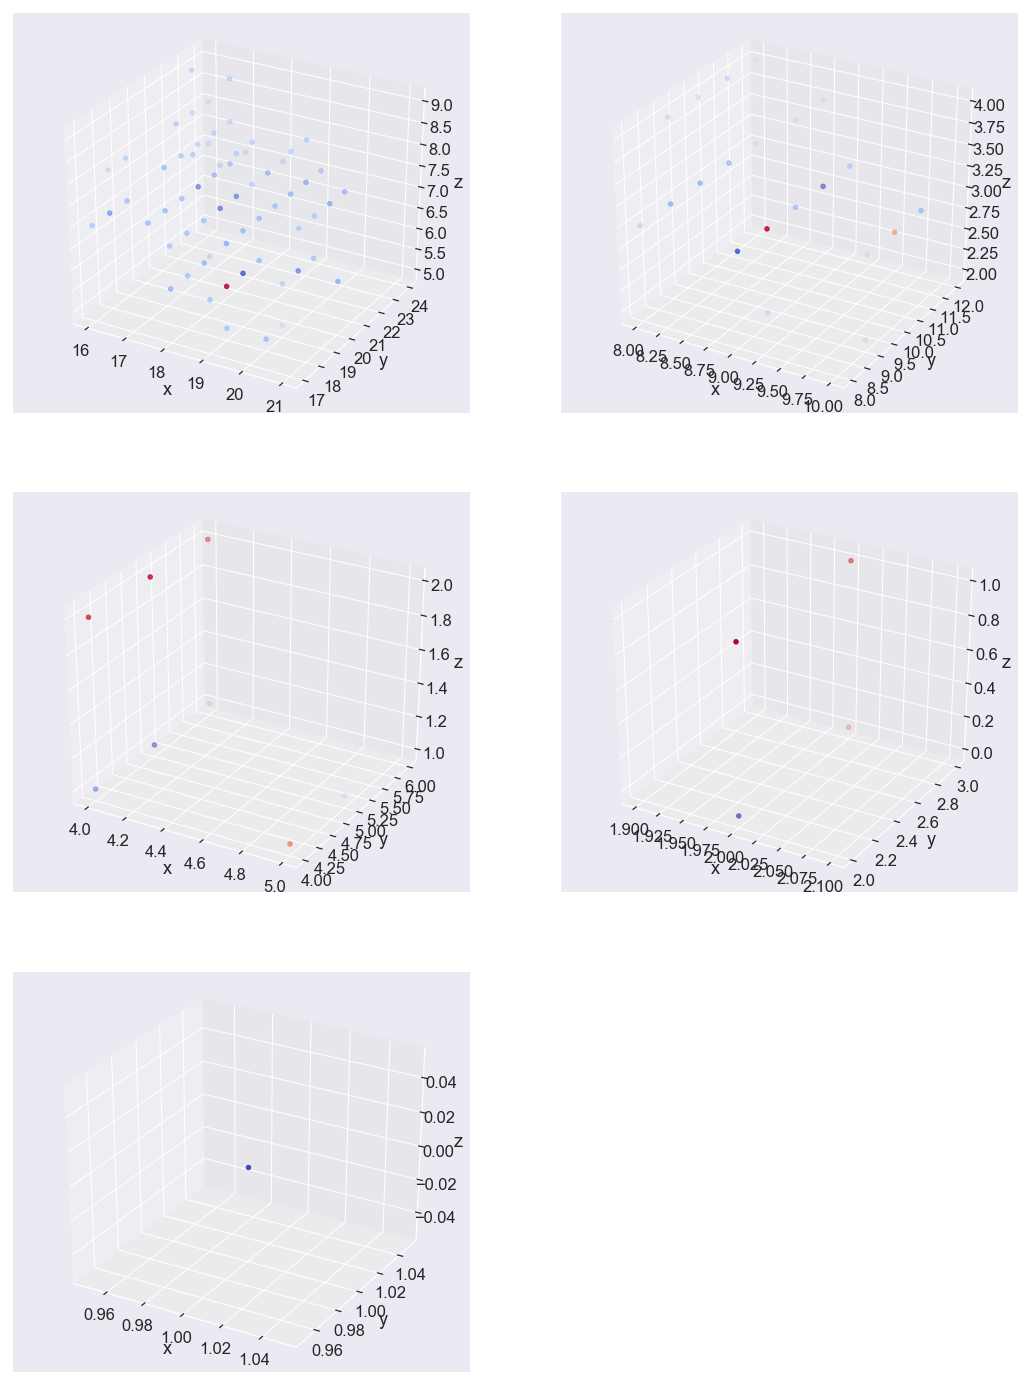

In [421]:
C1_L1_A1 = C4_L1_7A_allTR_mean[0,0,:,:,:]
C1_L2_A1 = C4_L2_7A_allTR_mean[0,0,:,:,:]
C1_L3_A1 = C4_L3_7A_allTR_mean[0,0,:,:,:]
C1_L4_A1 = C4_L4_7A_allTR_mean[0,0,:,:,:]
C1_L5_A1 = C4_L5_7A_allTR_mean[0,0,:,:,:]

x,y,z = np.where(C1_L1_A1!=0)
x2,y2,z2 = np.where(C1_L2_A1!=0)
x3,y3,z3 = np.where(C1_L3_A1!=0)
x4,y4,z4 = np.where(C1_L4_A1!=0)
x5,y5,z5 = np.where(C1_L5_A1!=0)

#C1_L1_A1.shape

# Multiple subplotting
fig = plt.figure(figsize= (18,25))

# First subplot
ax = fig.add_subplot(3, 2, 1, projection='3d')
ax.scatter3D(x,y,z,c=C1_L1_A1[x,y,z], cmap='coolwarm');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Second subplot
ax = fig.add_subplot(3, 2, 2, projection='3d')
ax.scatter3D(x2,y2,z2,c=C1_L2_A1[x2,y2,z2], cmap='coolwarm');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Third subplot
ax = fig.add_subplot(3, 2, 3, projection='3d')
ax.scatter3D(x3,y3,z3,c=C1_L3_A1[x3,y3,z3], cmap='coolwarm');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Fourth subplot
ax = fig.add_subplot(3, 2, 4, projection='3d')
ax.scatter3D(x4,y4,z4,c=C1_L4_A1[x4,y4,z4], cmap='coolwarm');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Fifth subplot
ax = fig.add_subplot(3, 2, 5, projection='3d')
ax.scatter3D(x5,y5,z5,c=C1_L5_A1[x5,y5,z5], cmap='coolwarm');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()

In [422]:
import plotly.graph_objs as go
fig1 = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,mode='markers',marker=dict(
        size=7,
        color=C1_L1_A1[x,y,z],                # set color to an array/list of desired values
        colorscale='Rainbow',   # choose a colorscale
        opacity=0.8,
    colorbar_title = 'WV_L1<br>coefficients'
    ))])
fig1.show()


fig2 = go.Figure(data=[go.Scatter3d(x=x2, y=y2, z=z2,mode='markers',marker=dict(
        size=7,
        color=C1_L2_A1[x2,y2,z2],                # set color to an array/list of desired values
        colorscale='Rainbow',   # choose a colorscale
        opacity=0.8,
    colorbar_title = 'WV_L2<br>coefficients'
    ))])
fig2.show()

fig3 = go.Figure(data=[go.Scatter3d(x=x3, y=y3, z=z3,mode='markers',marker=dict(
        size=7,
        color=C1_L3_A1[x3,y3,z3],                # set color to an array/list of desired values
        colorscale='Rainbow',   # choose a colorscale
        opacity=0.8,
    colorbar_title = 'WV_L3<br>coefficients'
    ))])
fig3.show()

fig4 = go.Figure(data=[go.Scatter3d(x=x4, y=y4, z=z4,mode='markers',marker=dict(
        size=7,
        color=C1_L4_A1[x4,y4,z4],                # set color to an array/list of desired values
        colorscale='Rainbow',   # choose a colorscale
        opacity=0.8,
    colorbar_title = 'WV_L4<br>coefficients'
    ))])
fig4.show()

fig5 = go.Figure(data=[go.Scatter3d(x=x5, y=y5, z=z5,mode='markers',marker=dict(
        size=7,
        color=C1_L5_A1[x5,y5,z5],                # set color to an array/list of desired values
        colorscale='Rainbow',   # choose a colorscale
        opacity=0.8,
    colorbar_title = 'WV_L5<br>coefficients'
    ))])
fig5.show()


# Useful links for rotating 3d plots with plotly/v3.0/
- https://plot.ly/python/3d-scatter-plots/
- https://plot.ly/python/v3/3d-scatter-plots/
- https://plot.ly/python/3d-bubble-charts/
- https://plot.ly/python/3d-subplots/
- https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Initialize figure with 4 3D subplots

figs = make_subplots(rows=2, cols=3)

# adding surfaces to subplots.
figs.add_trace(go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,mode='markers',marker=dict(
        size=7,
        color=C1_L1_A1[x,y,z],                # set color to an array/list of desired values
        colorscale='Rainbow',   # choose a colorscale
        opacity=0.8,
    colorbar_title = 'WV_L1<br>coefficients'
    ))]),row=1, col=1)

figs.add_trace(go.Figure(data=[go.Scatter3d(x=x2, y=y2, z=z2,mode='markers',marker=dict(
        size=7,
        color=C1_L2_A1[x2,y2,z2],                # set color to an array/list of desired values
        colorscale='Rainbow',   # choose a colorscale
        opacity=0.8,
    colorbar_title = 'WV_L2<br>coefficients'
    ))]),row=1, col=2)

figs.add_trace(go.Figure(data=[go.Scatter3d(x=x3, y=y3, z=z3,mode='markers',marker=dict(
        size=7,
        color=C1_L3_A1[x3,y3,z3],                # set color to an array/list of desired values
        colorscale='Rainbow',   # choose a colorscale
        opacity=0.8,
    colorbar_title = 'WV_L3<br>coefficients'
    ))]),row=1, col=3)

figs.add_trace(go.Figure(data=[go.Scatter3d(x=x4, y=y4, z=z4,mode='markers',marker=dict(
        size=7,
        color=C1_L4_A1[x4,y4,z4],                # set color to an array/list of desired values
        colorscale='Rainbow',   # choose a colorscale
        opacity=0.8,
    colorbar_title = 'WV_L4<br>coefficients'
    ))]),row=2, col=1)

figs.add_trace(go.Figure(data=[go.Scatter3d(x=x5, y=y5, z=z5,mode='markers',marker=dict(
        size=7,
        color=C1_L5_A1[x5,y5,z5],                # set color to an array/list of desired values
        colorscale='Rainbow',   # choose a colorscale
        opacity=0.8,
    colorbar_title = 'WV_L5<br>coefficients'
    ))]),row=2, col=2)

figs.update_layout(title_text='Faces five levels Angle_1',height=800,width=800)

figs.show()

## C2(faces) _All levels _A1 plotting

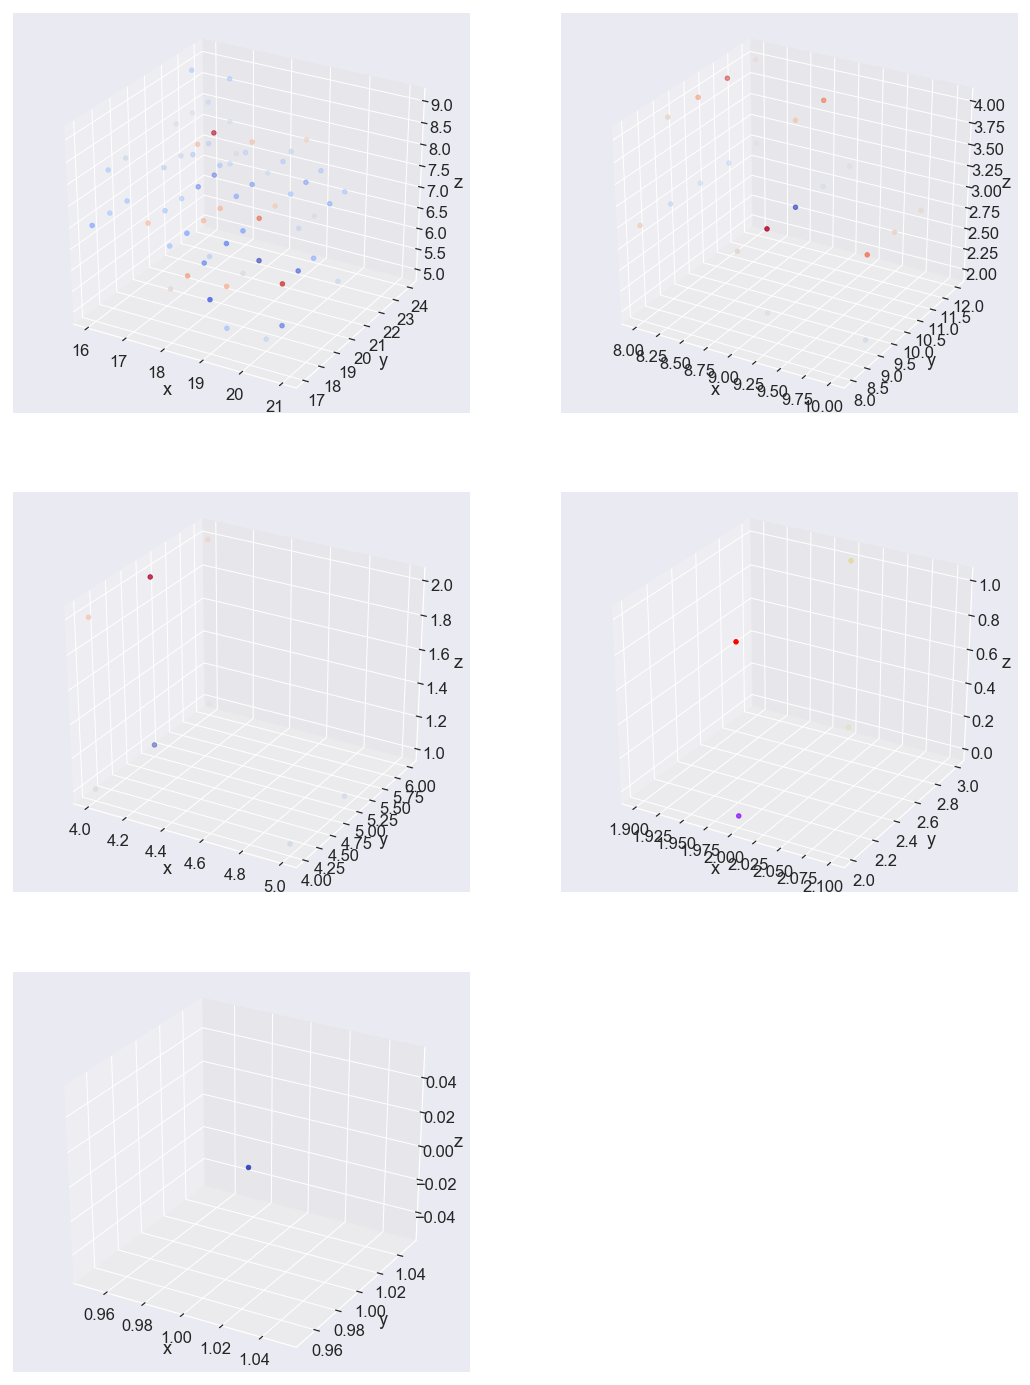

In [423]:
C2_L1_A1 = C4_L1_7A_allTR_mean[1,0,:,:,:]
C2_L2_A1 = C4_L2_7A_allTR_mean[1,0,:,:,:]
C2_L3_A1 = C4_L3_7A_allTR_mean[1,0,:,:,:]
C2_L4_A1 = C4_L4_7A_allTR_mean[1,0,:,:,:]
C2_L5_A1 = C4_L5_7A_allTR_mean[1,0,:,:,:]

x,y,z = np.where(C2_L1_A1!=0)
x2,y2,z2 = np.where(C2_L2_A1!=0)
x3,y3,z3 = np.where(C2_L3_A1!=0)
x4,y4,z4 = np.where(C2_L4_A1!=0)
x5,y5,z5 = np.where(C2_L5_A1!=0)


# Multiple subplotting
fig = plt.figure(figsize= (18,25))

# First subplot
ax = fig.add_subplot(3, 2, 1, projection='3d')
ax.scatter3D(x,y,z,c=C2_L1_A1[x,y,z], cmap='coolwarm');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Second subplot
ax = fig.add_subplot(3, 2, 2, projection='3d')
ax.scatter3D(x2,y2,z2,c=C2_L2_A1[x2,y2,z2], cmap='coolwarm');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Third subplot
ax = fig.add_subplot(3, 2, 3, projection='3d')
ax.scatter3D(x3,y3,z3,c=C2_L3_A1[x3,y3,z3], cmap='coolwarm');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Fourth subplot
ax = fig.add_subplot(3, 2, 4, projection='3d')
ax.scatter3D(x4,y4,z4,c=C2_L4_A1[x4,y4,z4], cmap='rainbow');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Fifth subplot
ax = fig.add_subplot(3, 2, 5, projection='3d')
ax.scatter3D(x5,y5,z5,c=C2_L5_A1[x5,y5,z5], cmap='coolwarm');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()

## C3(shapes) _All levels _A1 plotting

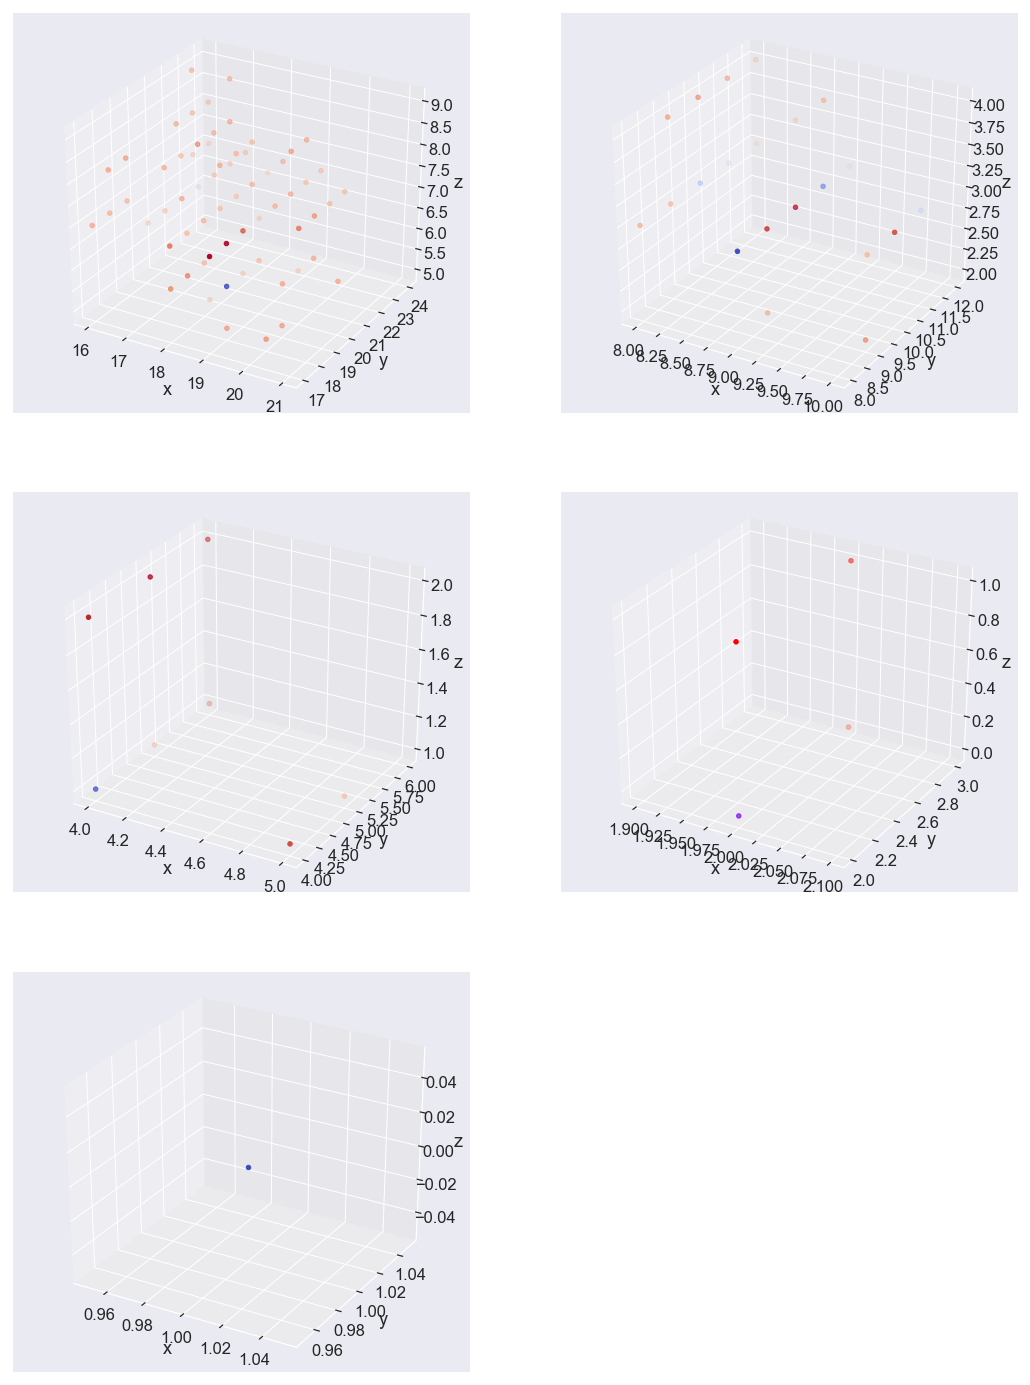

In [424]:
C3_L1_A1 = C4_L1_7A_allTR_mean[2,0,:,:,:]
C3_L2_A1 = C4_L2_7A_allTR_mean[2,0,:,:,:]
C3_L3_A1 = C4_L3_7A_allTR_mean[2,0,:,:,:]
C3_L4_A1 = C4_L4_7A_allTR_mean[2,0,:,:,:]
C3_L5_A1 = C4_L5_7A_allTR_mean[2,0,:,:,:]

x,y,z = np.where(C3_L1_A1!=0)
x2,y2,z2 = np.where(C3_L2_A1!=0)
x3,y3,z3 = np.where(C3_L3_A1!=0)
x4,y4,z4 = np.where(C3_L4_A1!=0)
x5,y5,z5 = np.where(C3_L5_A1!=0)


# Multiple subplotting
fig = plt.figure(figsize= (18,25))

# First subplot
ax = fig.add_subplot(3, 2, 1, projection='3d')
ax.scatter3D(x,y,z,c=C3_L1_A1[x,y,z], cmap='coolwarm');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Second subplot
ax = fig.add_subplot(3, 2, 2, projection='3d')
ax.scatter3D(x2,y2,z2,c=C3_L2_A1[x2,y2,z2], cmap='coolwarm');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Third subplot
ax = fig.add_subplot(3, 2, 3, projection='3d')
ax.scatter3D(x3,y3,z3,c=C3_L3_A1[x3,y3,z3], cmap='coolwarm');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Fourth subplot
ax = fig.add_subplot(3, 2, 4, projection='3d')
ax.scatter3D(x4,y4,z4,c=C3_L4_A1[x4,y4,z4], cmap='rainbow');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Fifth subplot
ax = fig.add_subplot(3, 2, 5, projection='3d')
ax.scatter3D(x5,y5,z5,c=C3_L5_A1[x5,y5,z5], cmap='coolwarm');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()

## C4(number) _All levels _A1 plotting

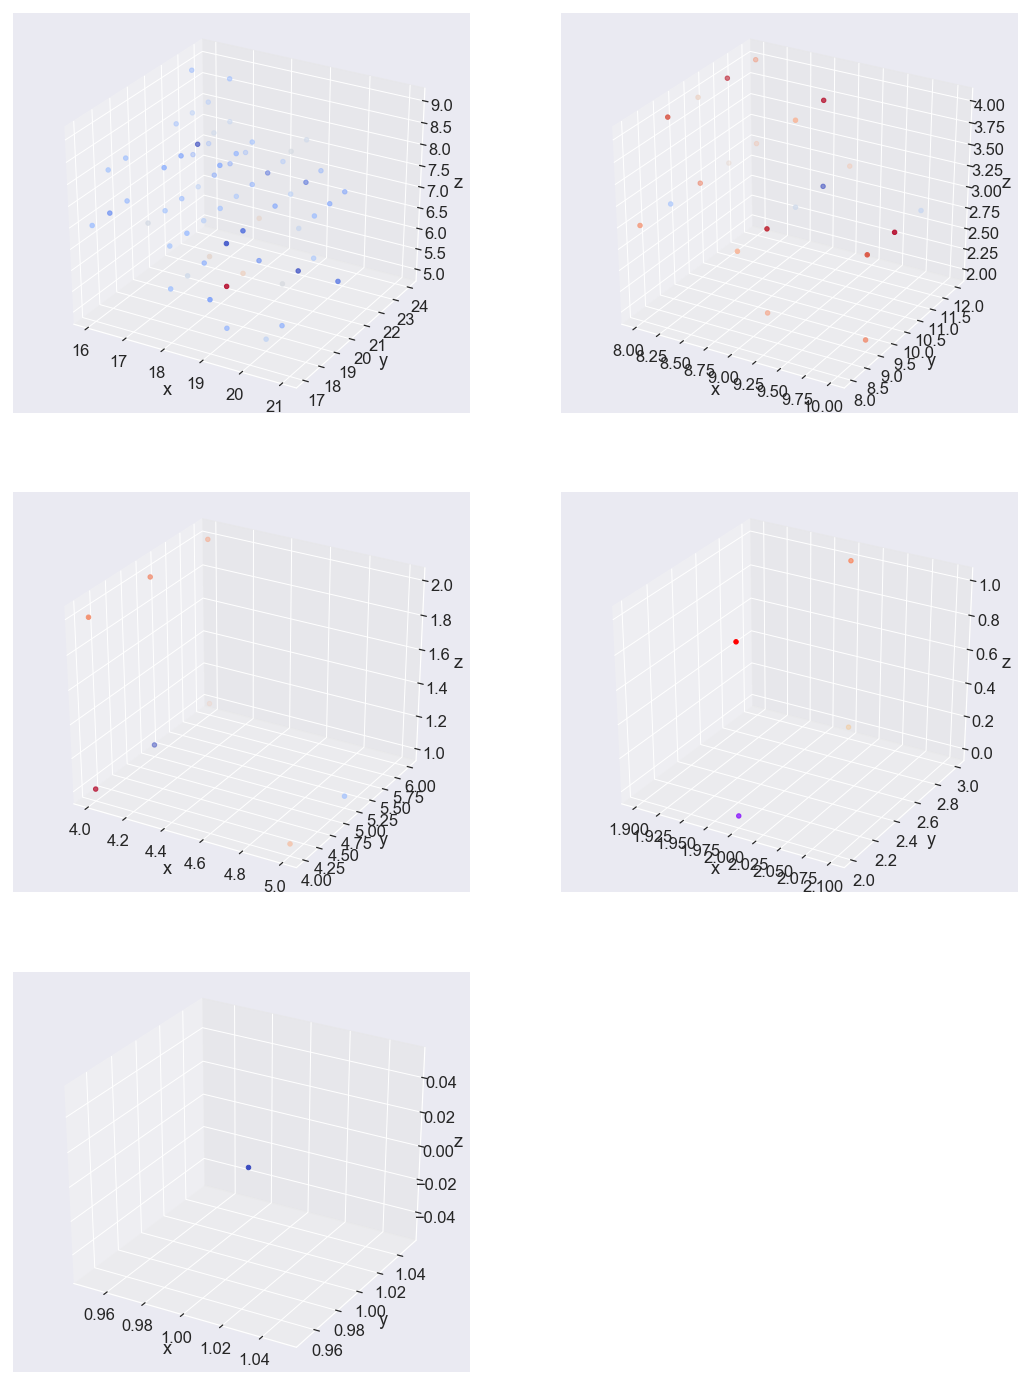

In [425]:
C4_L1_A1 = C4_L1_7A_allTR_mean[3,0,:,:,:]
C4_L2_A1 = C4_L2_7A_allTR_mean[3,0,:,:,:]
C4_L3_A1 = C4_L3_7A_allTR_mean[3,0,:,:,:]
C4_L4_A1 = C4_L4_7A_allTR_mean[3,0,:,:,:]
C4_L5_A1 = C4_L5_7A_allTR_mean[3,0,:,:,:]

x,y,z = np.where(C4_L1_A1!=0)
x2,y2,z2 = np.where(C4_L2_A1!=0)
x3,y3,z3 = np.where(C4_L3_A1!=0)
x4,y4,z4 = np.where(C4_L4_A1!=0)
x5,y5,z5 = np.where(C4_L5_A1!=0)


# Multiple subplotting
fig = plt.figure(figsize= (18,25))

# First subplot
ax = fig.add_subplot(3, 2, 1, projection='3d')
ax.scatter3D(x,y,z,c=C4_L1_A1[x,y,z], cmap='coolwarm');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Second subplot
ax = fig.add_subplot(3, 2, 2, projection='3d')
ax.scatter3D(x2,y2,z2,c=C4_L2_A1[x2,y2,z2], cmap='coolwarm');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Third subplot
ax = fig.add_subplot(3, 2, 3, projection='3d')
ax.scatter3D(x3,y3,z3,c=C4_L3_A1[x3,y3,z3], cmap='coolwarm');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Fourth subplot
ax = fig.add_subplot(3, 2, 4, projection='3d')
ax.scatter3D(x4,y4,z4,c=C4_L4_A1[x4,y4,z4], cmap='rainbow');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Fifth subplot
ax = fig.add_subplot(3, 2, 5, projection='3d')
ax.scatter3D(x5,y5,z5,c=C4_L5_A1[x5,y5,z5], cmap='coolwarm');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()